# Example plots using kilosort.data_tools

##### Note that `kilosort.data_tools` was added in `v4.0.21`, so you will need to update Kilosort4 to at least that version to use these examples. This can be done using `pip install kilosort --upgrade`.

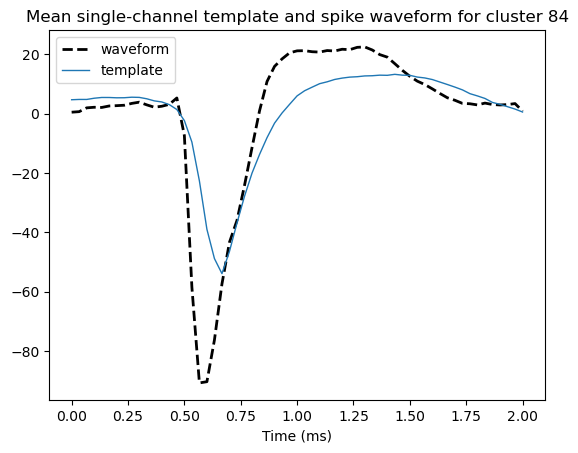

In [5]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from kilosort.io import load_ops
from kilosort.data_tools import (
    mean_waveform, cluster_templates, get_good_cluster, get_cluster_spikes,
    get_spike_waveforms, get_best_channels
    )


# Indicate where sorting results were saved
results_dir = Path('d:/.kilosort/.test_data/kilosort4')

# Pick a random good cluster
cluster_id = get_good_cluster(results_dir, n=1)

# Get the mean spike waveform and mean templates for the cluster
mean_wv = mean_waveform(cluster_id, results_dir, n_spikes=100, bfile=None, best=True)
mean_temp = cluster_templates(cluster_id, results_dir, mean=True, best=True)

# Get time in ms for visualization
ops = load_ops(results_dir / 'ops.npy')
t = (np.arange(ops['nt']) / ops['fs']) * 1000

fig, ax = plt.subplots(1,1)
ax.plot(t, mean_wv, c='black', linestyle='dashed', linewidth=2, label='waveform')
ax.plot(t, mean_temp, linewidth=1, label='template')
ax.set_title(f'Mean single-channel template and spike waveform for cluster {cluster_id}')
ax.set_xlabel('Time (ms)')
ax.legend()

In [2]:
# Recommended: `pip install ipympl` then use this command to enable
#              interactive plotting, so that the 3D plot below can be rotated.
%matplotlib ipympl

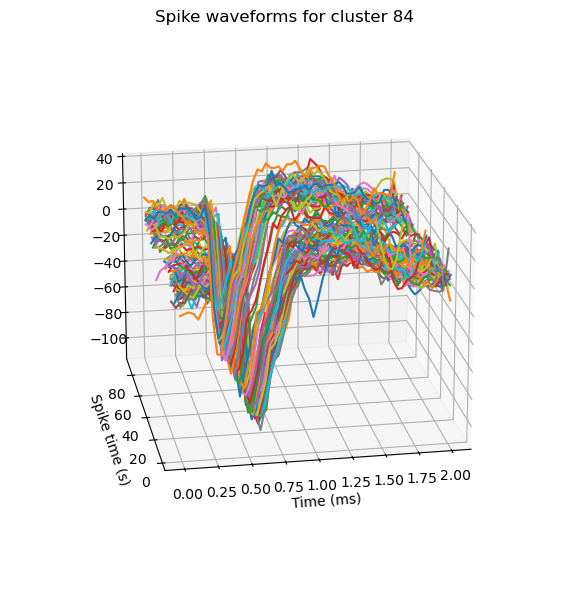

In [6]:
# Get n spike times for this cluster
spike_times = get_cluster_spikes(cluster_id, results_dir, n_spikes=100)
# Time in s for spike time axis
t2 = spike_times / ops['fs']
# Get single-channel waveform for each spike
chan = get_best_channels(results_dir)[cluster_id]
waves = get_spike_waveforms(spike_times, results_dir, chan=chan)

# Plot each waveform, using spike time as 3rd dimension
fig, ax = plt.subplots(1, 1, figsize=(6,6), subplot_kw={'projection': '3d'})
for i in range(waves.shape[1]):
    # TODO: color by spike time
    ax.plot(t, t2[i], zs=waves[:,i], zdir='z');
ax.set_xlabel('Time (ms)');
ax.set_ylabel('Spike time (s)');
ax.view_init(azim=-100, elev=20);
ax.set_title(f'Spike waveforms for cluster {cluster_id}')
ax.set_box_aspect(None, zoom=0.85)

plt.tight_layout()

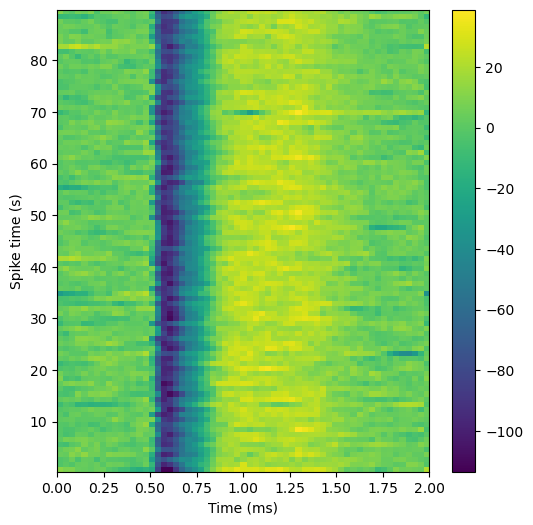

In [7]:
# Can also visualize this as a heatmap
fig2, ax2 = plt.subplots(1,1,figsize=(6,6))
pos = ax2.imshow(waves.T, aspect='auto', extent=[t[0], t[-1], t2[0], t2[-1]]);
fig2.colorbar(pos, ax=ax2);
ax2.set_xlabel('Time (ms)');
ax2.set_ylabel('Spike time (s)');